# CALIFORNIA HOUSING DATA SET

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

from subprocess import check_output

#### Content

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

- longitude

- latitude

- housing_median_age

- total_rooms

- total_bedrooms

- population

- households

- median_income

- median_house_value

- ocean_proximity

### READ THE DATA

In [2]:
import pandas as pd
df = pd.read_csv("D:/housing.csv")
#df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### DIMENSION OF OUR DATA

In [3]:
print(df.shape)
print("*"*50)

(20640, 10)
**************************************************


#### DESCRIPTION OF OUR DATA

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

Number of variables,10
Number of observations,20640
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,80.0 B
Numeric,7
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,2


## Skewness

It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution.
It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0.

There are two types of Skewness: Positive and Negative
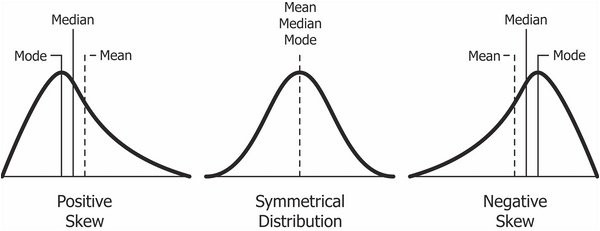


<p><strong>Positive Skewness</strong> means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

<p><strong>Negative Skewness</strong> is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.


    If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
    If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
    If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.
    
    
### Kurtosis

High kurtosis in a data set is an indicator that data has heavy tails or outliers. If there is a high kurtosis, then, we need to investigate why do we have so many outliers. It indicates a lot of things, maybe wrong data entry or other things. Investigate!
Low kurtosis in a data set is an indicator that data has light tails or lack of outliers. If we get low kurtosis(too good to be true), then also we need to investigate and trim the dataset of unwanted results.



Skewness: 0.977763
Kurtosis: 0.327870


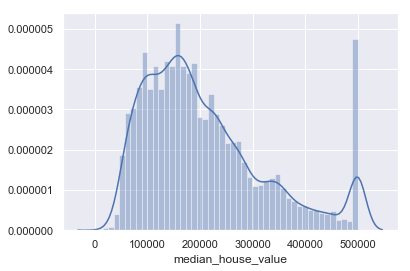

In [5]:
sns.distplot(df['median_house_value']);
#skewness and kurtosis
print("Skewness: %f" % df['median_house_value'].skew())
print("Kurtosis: %f" % df['median_house_value'].kurt())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


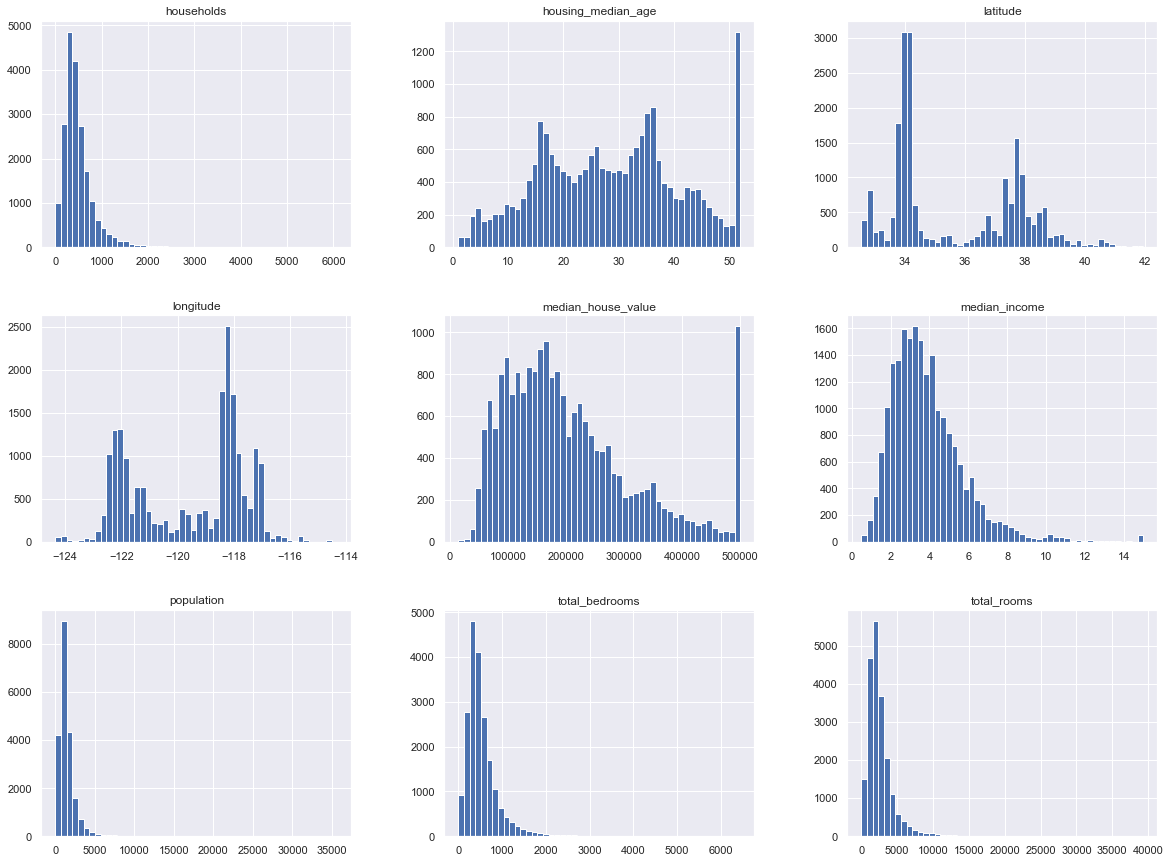

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


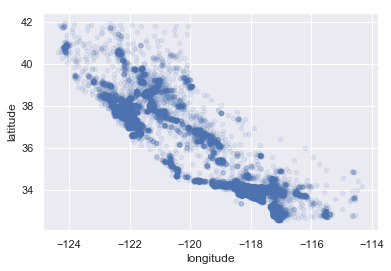

In [8]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

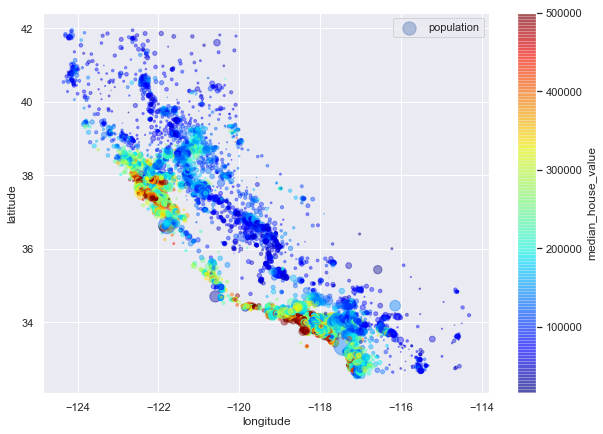

In [9]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

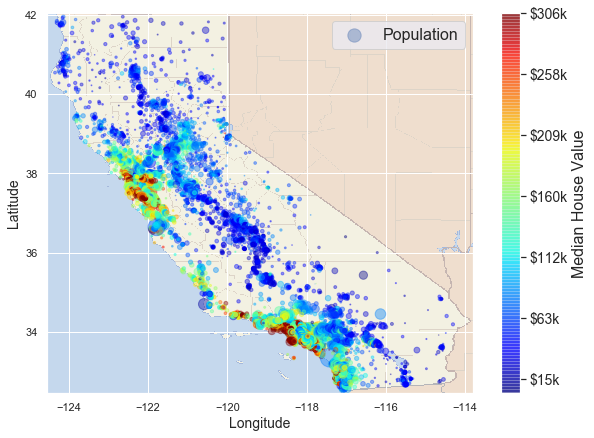

In [10]:
import matplotlib.image as mpimg
california_img=mpimg.imread('D:/bert/california.png')
ax = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=df['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Seperating the variables by type

In [11]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  9
Number of Categorical features:  1


### REMOVING NA VALUES

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
total_bedrooms,207,0.010029
ocean_proximity,0,0.000000
median_house_value,0,0.000000
median_income,0,0.000000
households,0,0.000000
population,0,0.000000
total_rooms,0,0.000000
housing_median_age,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


In [13]:
# REPLACE MISSING VARIABLES BY MEAN
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

### PLOTTING THE NUMERICAL VARIABLES INDIVIDUALLY

In [14]:
def plot_feature_distribution(df1, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(3,3,figsize=(15,15))

    for feature in features:
        i += 1
        plt.subplot(3,3,i)
        sns.distplot(df1[feature], hist = False, label="Skewness: %f" % df[feature].skew())
        sns.distplot(df1[feature], hist = False, label="Kurtosis: %f" % df[feature].kurt())
        plt.xlabel(feature, fontsize=15)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12, pad=-9)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();

In [15]:
numerical_feats = df.dtypes[df.dtypes != "object"].index

<Figure size 432x288 with 0 Axes>

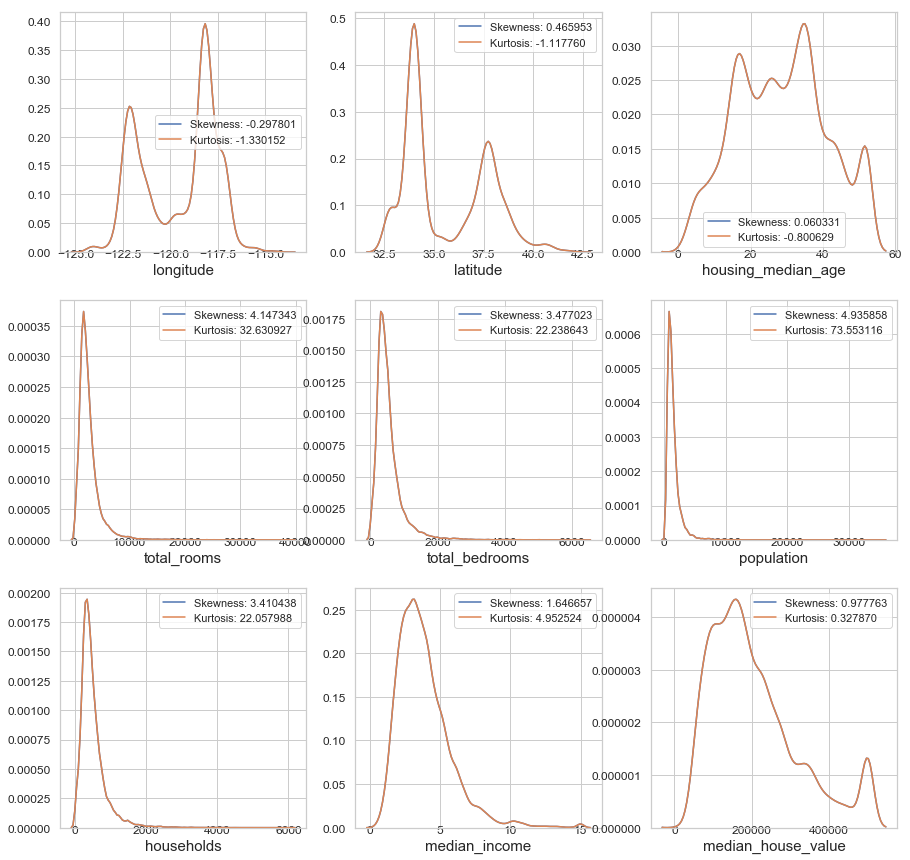

In [16]:
plot_feature_distribution(df, numerical_feats)

### UNDERSTANDING IF THE VARIABLES HAS A CORRELATION WITH EACH OTHER (multicollinearity)

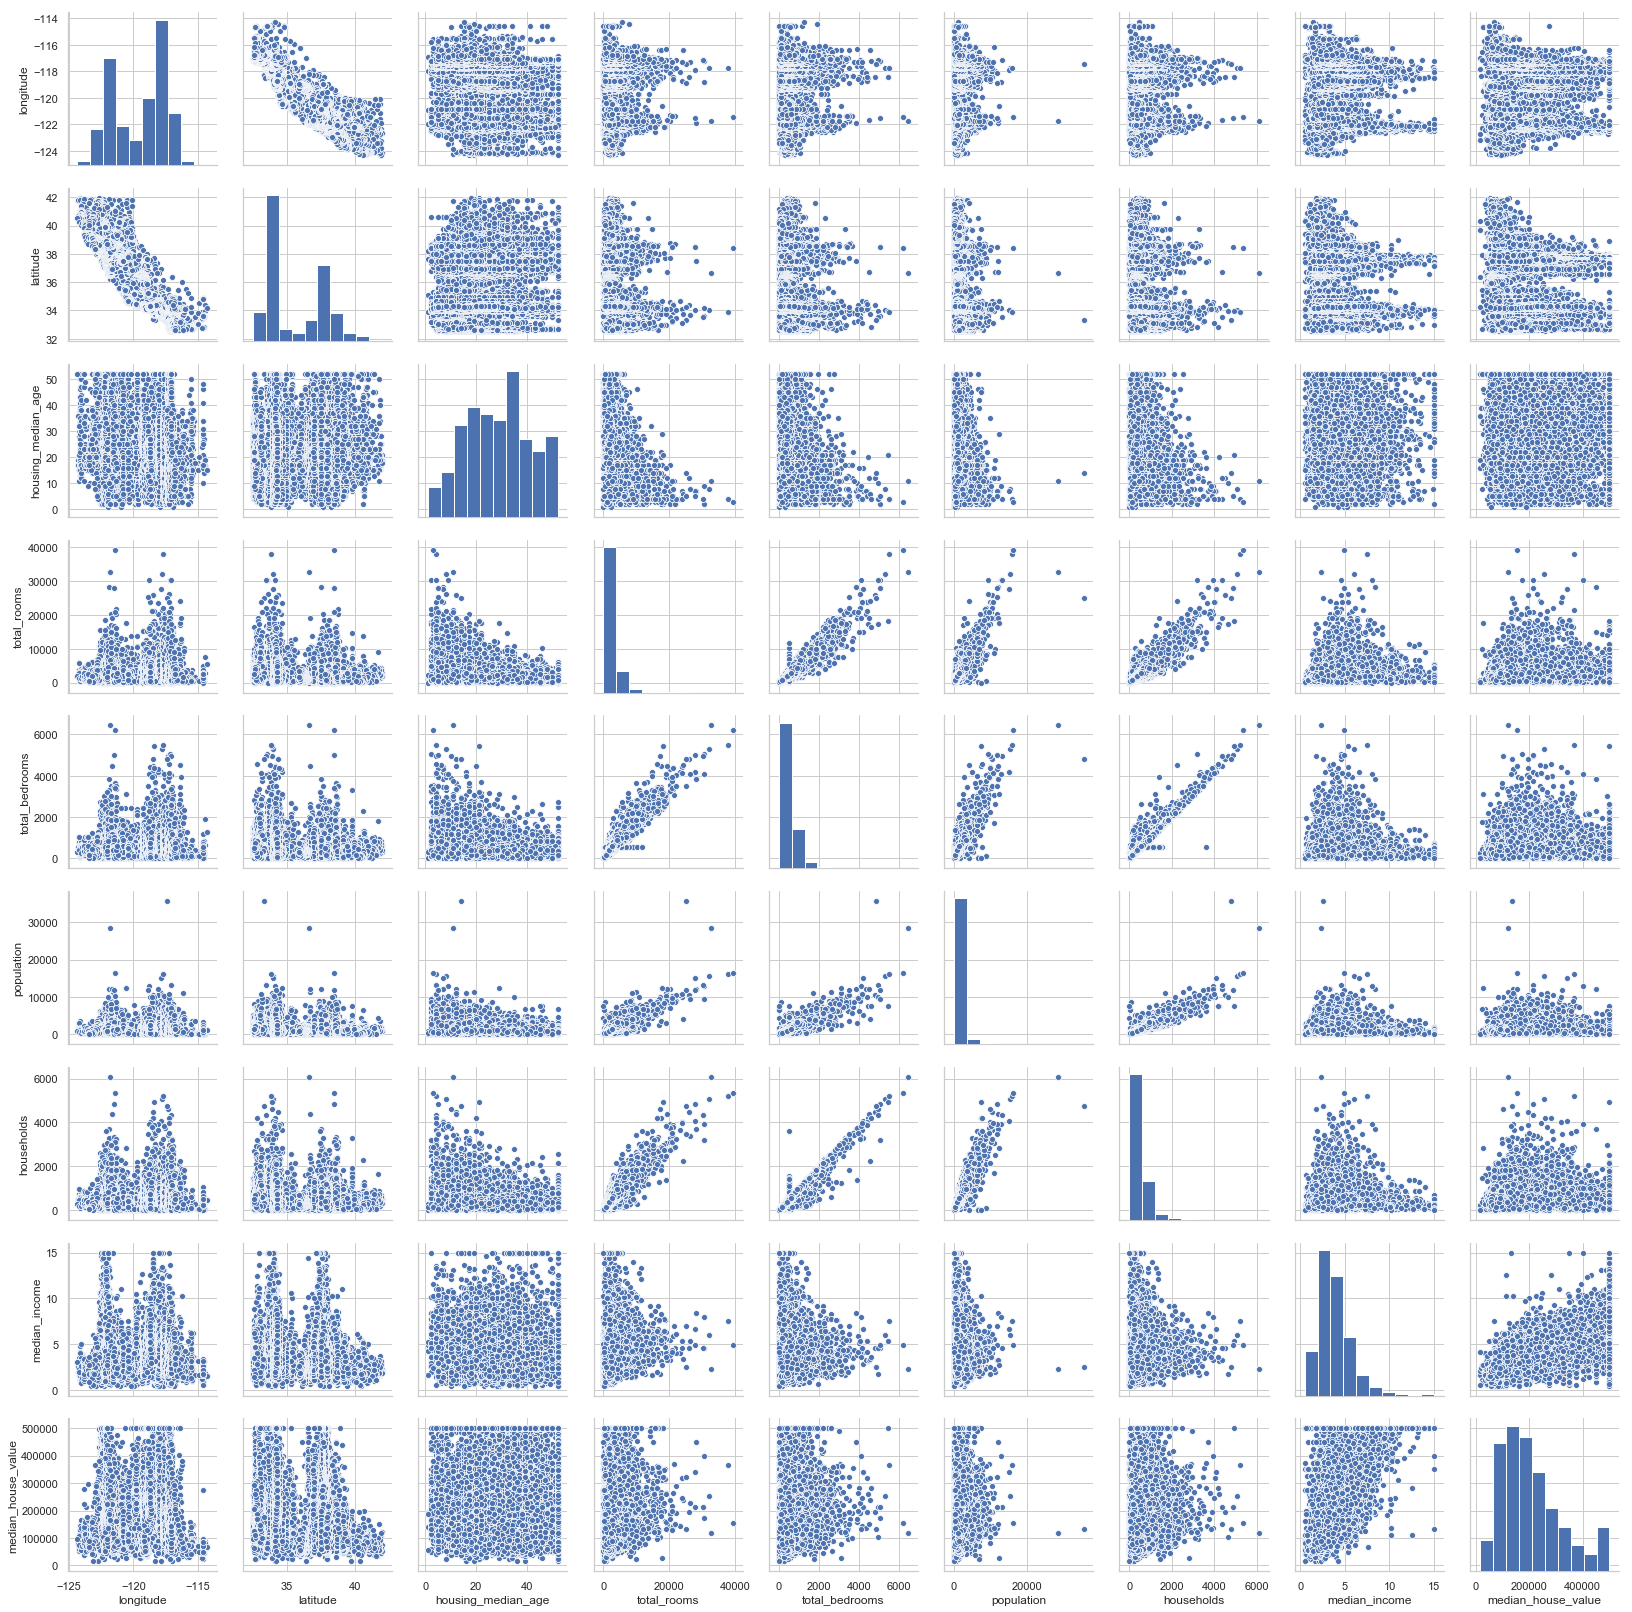

In [17]:
sns.pairplot(df[numerical_feats]);

# UNDERSTANDING THE RELATION BETWEEN TARGET VARIABLE AND THE REGRESSORS

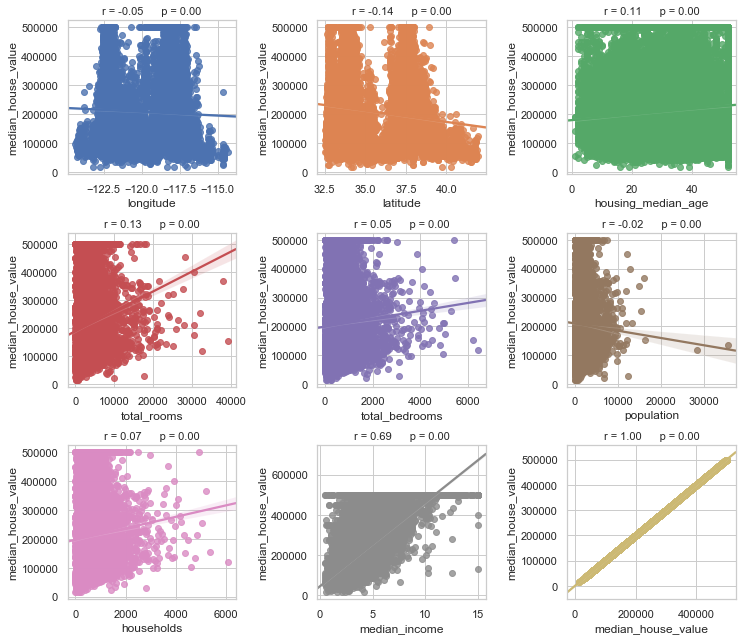

In [18]:
nr_rows = 3
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_num_feats):
            sns.regplot(df[li_num_feats[i]], df["median_house_value"], ax = axs[r][c])
            stp = stats.pearsonr(df[li_num_feats[i]], df["median_house_value"])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()  

## BOX PLOT

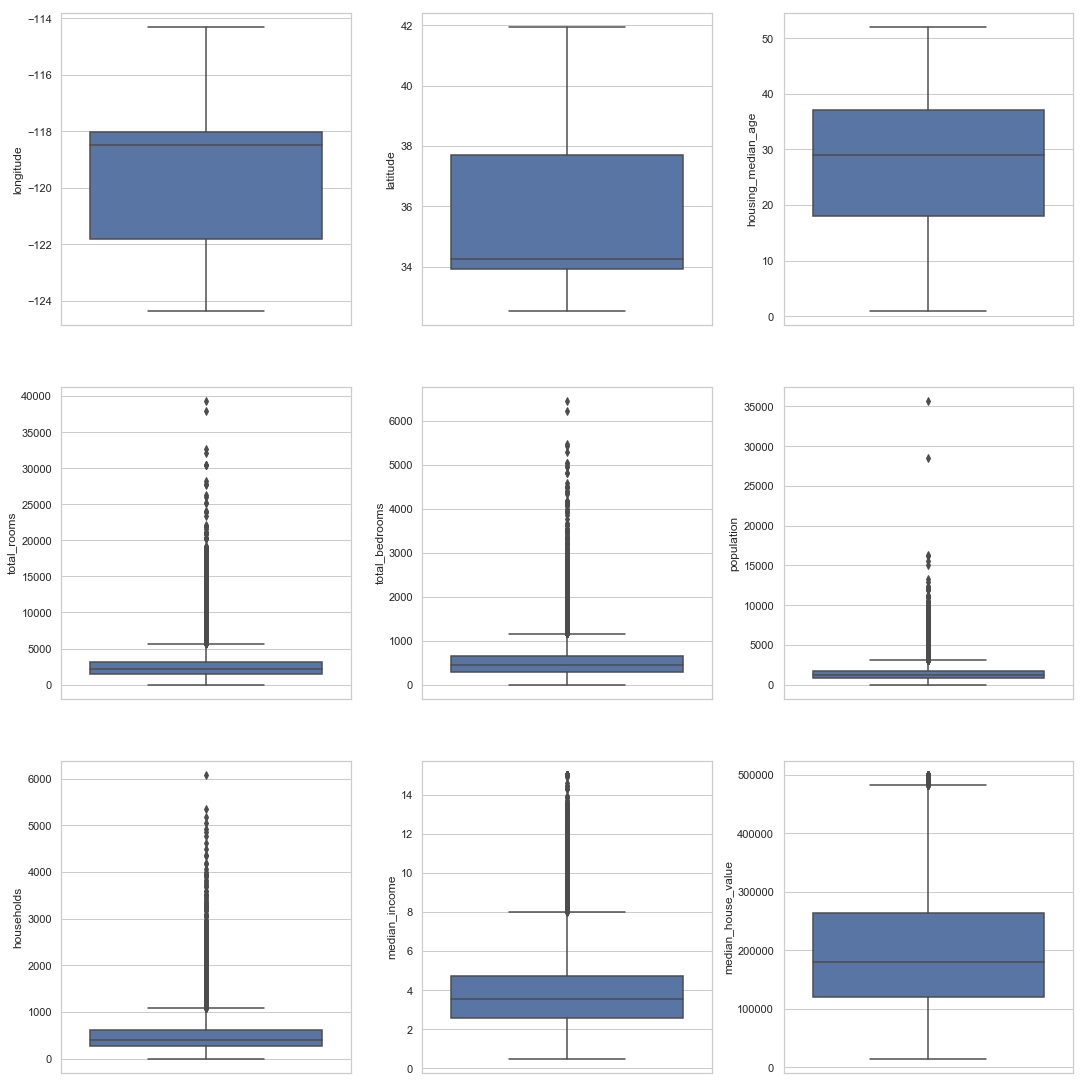

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for var, subplot in zip(numerical_feats, ax.flatten()):
    sns.boxplot(y=var, data=df, ax=subplot)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### CORRELATION MAP

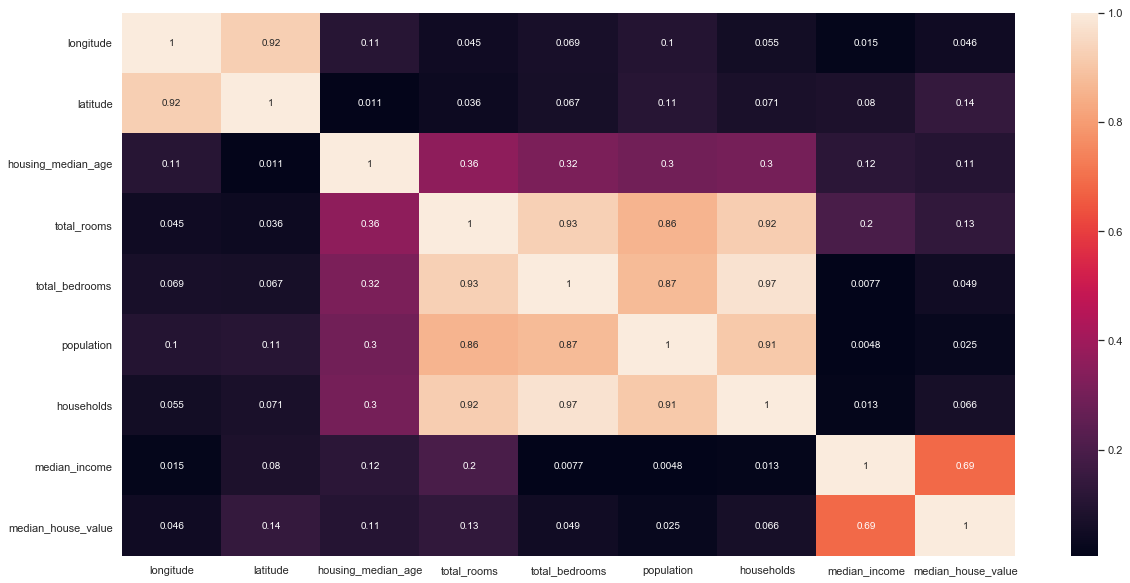

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[numerical_feats].corr().abs(),  annot=True)

### Analyzing the Categorical Column

In [21]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

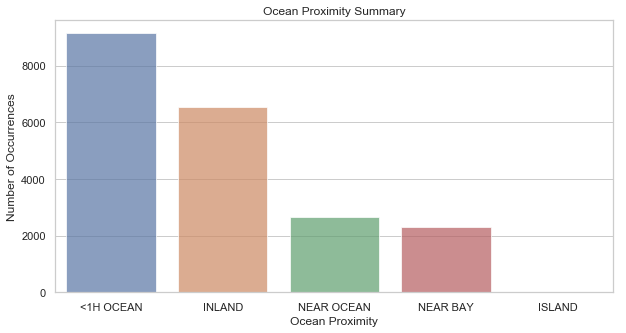

In [22]:
op_count = df['ocean_proximity'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()
# housing['ocean_proximity'].value_counts().hist()

In [23]:
# Approach 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

In [24]:
df['ocean_proximity'].unique()

array([3, 0, 1, 4, 2], dtype=int64)

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [29]:
#from sklearn.preprocessing import OneHotEncoder

## LINEAR REGRESSION

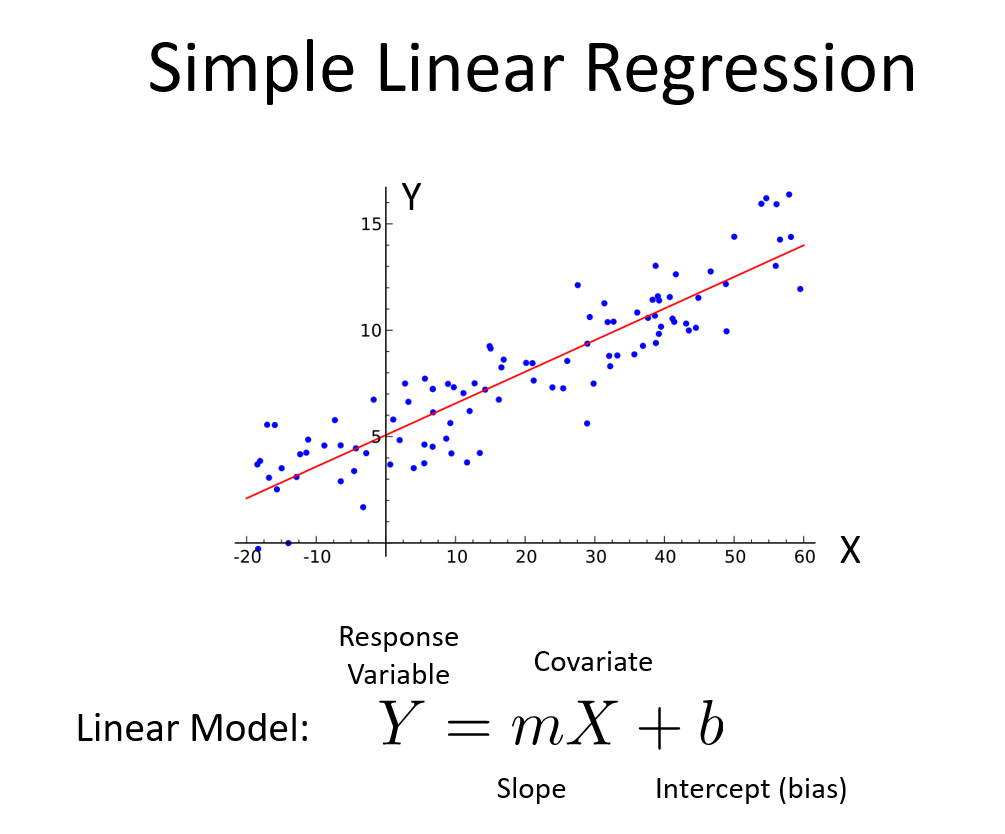

In [26]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

reg = linear_model.LinearRegression()

In [27]:
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']
print(X.shape, y.shape)

(20640, 9) (20640,)


In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [29]:
print(X_train.shape)
print(X_test.shape)

(16512, 9)
(4128, 9)


In [30]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
pred = reg.predict(X_test)

In [32]:
print('Predicted Value :',pred[0])
print('Actual Value :',Y_test.values[0])

Predicted Value : 128106.17410352407
Actual Value : 69600.0


In [33]:
X_train = X_train.reset_index()

In [38]:
# def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
#     """
#         Plots modelled vs fact values, prediction intervals and anomalies
    
#     """
    
#     prediction = model.predict(X_test) # prediction on test values
    
#     plt.figure(figsize=(15, 7))
#     plt.plot(prediction, "g", label="prediction", linewidth=2.0)
#     plt.plot(Y_test.values, label="actual", linewidth=2.0)
    
#     if plot_intervals:
#         cv = cross_val_score(model, X_train, Y_train, 
#                                     #cv=tscv, 
#                                     scoring="neg_mean_absolute_error")
#         mae = cv.mean() * (-1)
#         deviation = cv.std()
        
#         #95% Confidence Interval is shown
#         scale = 1.96 
#         lower = prediction - (mae + scale * deviation)
#         upper = prediction + (mae + scale * deviation)
        
#         plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
#         plt.plot(upper, "r--", alpha=0.5)
        
#         if plot_anomalies:
#             anomalies = np.array([np.NaN]*len(Y_test))
#             anomalies[Y_test<lower] = Y_test[Y_test<lower]
#             anomalies[Y_test>upper] = Y_test[Y_test>upper]
#             plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
#     error = mean_absolute_percentage_error(prediction, Y_test)
#     plt.title("Mean absolute percentage error {0:.2f}%".format(error))
#     plt.legend(loc="best")
#     plt.tight_layout()
#     plt.grid(True);
    
# def plotCoefficients(model):
#     """
#         Plots sorted coefficient values of the model
#     """
    
#     coefs = pd.DataFrame(model.coef_, X_train.columns)
#     coefs.columns = ["coef"]
#     coefs["abs"] = coefs.coef.apply(np.abs)
#     coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
#     plt.figure(figsize=(15, 7))
#     coefs.coef.plot(kind='bar')
#     plt.grid(True, axis='y')
#     plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [34]:
from sklearn.model_selection import cross_val_score

In [40]:

# from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
# from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

# def mean_absolute_percentage_error(Y_test, pred): 
#     return np.mean(np.abs((Y_test - pred) / Y_test)) * 100

In [35]:
pred.shape

(4128,)

In [44]:
# plotModelResults(reg, plot_intervals=True)
# plotCoefficients(reg)

In [36]:
X_train

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,13292,-117.66,34.08,36.0,1485.0,236.0,623.0,261.0,3.3036,1
1,9593,-120.46,37.33,4.0,786.0,116.0,368.0,109.0,6.3215,1
2,12968,-121.33,38.70,15.0,2226.0,421.0,1004.0,417.0,2.7868,1
3,18119,-122.03,37.32,15.0,5132.0,1059.0,2156.0,982.0,5.6511,0
4,18865,-122.22,38.11,43.0,1939.0,353.0,968.0,392.0,3.1848,3
5,13080,-121.35,38.54,12.0,16239.0,3358.0,8656.0,3234.0,3.5691,1
6,14014,-117.18,32.75,36.0,2282.0,534.0,918.0,531.0,2.7222,4
7,4772,-118.34,34.04,42.0,1681.0,360.0,987.0,337.0,2.6000,0
8,2990,-118.99,35.32,35.0,1576.0,405.0,870.0,282.0,1.6575,1
9,17605,-121.89,37.30,46.0,2639.0,448.0,938.0,424.0,5.0662,0


In [37]:
res = pd.DataFrame({'Predicted':pred,'Actual':Y_test})
res = res.reset_index()
res = res.drop(['index'],axis=1)

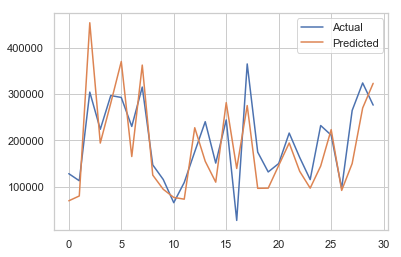

In [38]:
plt.plot(res[:30])
plt.legend(['Actual','Predicted'])

## OPPORTUINITIES

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('median_house_value ~ longitude + latitude + housing_median_age + total_rooms + \
                  total_bedrooms+population+households+median_income+ocean_proximity', data=df).fit()

In [40]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3999.
Date:                Tue, 01 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:14:54   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20630   BIC:                         5.190e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.568e+06   6.55

for more info visit: http://people.duke.edu/~rnau/testing.htm

Both R2 and the adjusted R2 give you an idea of how many data points fall within the line of the regression equation. However, there is one main difference between R2 and the adjusted R2: R2 assumes that every single variable explains the variation in the dependent variable. The adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable. 

#  DIRECTOR'S CUT VERSION!  O.O

In [33]:
import pandas as pd
df = pd.read_csv("D:/housing.csv")
#df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy.random as rnd
rnd.seed(42)

from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import Imputer,StandardScaler

In [35]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

class FeaturesAdder(BaseEstimator,TransformerMixin):
    """This class adds new features in the dataset.
        Features added are : rooms_per_household, bedrooms_per_room, and population_per_household.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X['rooms_per_household']=X['total_rooms']/X['households']
        X['bedrooms_per_room']=X['total_bedrooms']/X['total_rooms']
        X['population_per_household']=X['population']/X['households']
        return X


class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['median_house_value']!=500001) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[X['median_income']<=11].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000) | (X['median_income']>=1.5)].reset_index(drop=True)
        X=X[(X['median_house_value']!=450000) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[(X['median_house_value']>=350000) | (X['median_income']<=9.5)].reset_index(drop=True)
        X=X[X['population']<=9000]
        X=X[(X['population_per_household']>=1.15) & (X['population_per_household']<=6.5)]
        X=X[X['rooms_per_household']<20]
        X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X
    

class FeaturesTransformer(BaseEstimator,TransformerMixin):
    """This class trnsforms numberical featuress in the dataset.
    Note: Transformations are hard coded.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        import numpy as np
        from scipy.special import boxcox1p        
        X['total_rooms']=X['total_rooms'].apply(lambda x: boxcox1p(x,0.25))
        X['total_bedrooms']=X['total_bedrooms'].apply(lambda x: boxcox1p(x,0.25))
        X['households']=X['households'].apply(lambda x: boxcox1p(x,0.2))
        X['population']=X['population'].apply(lambda x: boxcox1p(x,0.3))
        X['rooms_per_household']=X['rooms_per_household'].apply(lambda x: np.log1p(x)**0.5)
        X['bedrooms_per_room']=X['bedrooms_per_room'].apply(lambda x: np.log1p(x)**0.25)
        X['median_income']=X['median_income'].apply(lambda x: np.log1p(x)**1.25)
        X['population_per_household']=X['population_per_household'].apply(lambda x: np.log1p(x)**1)
        return X
    

class DataFrameSelector(BaseEstimator,TransformerMixin):
    """This class is a dataframe selector.
        Data members:
            features: A list of column_names you want in output dataframe
    """
    def __init__(self,features):
        self.features=features
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.features]

class GetDummies(BaseEstimator,TransformerMixin):
    """This class is used to get dummy columns from categorical columns."""
    def fit (self,X,y=None):
        return self
    def transform(self,X,y=None):
        #change ISLAND to NEAR BAY...as count of ISLAND is very low
        X[X=='ISLAND']='NEAR BAY'
        return (pd.get_dummies(X,drop_first=True))

In [37]:
def remove_by_pvalue(X,y,pvalue=0.05):
    """Remove features with p-value more than 'pvalue'
    
    This function uses statsmodels.api.OLS model. Please add intercept to data externally.
    Input:
        X: Array or dataframe excluding predicted variable
        y: Series or list of predicted variable
        pvalue: int or float
    
    Note:
        X is changed inplace
    """
    import statsmodels.api as sm
    for i in range(len(X.columns)):
        regressor_OLS=sm.OLS(endog=y,exog=X).fit()
        s=regressor_OLS.pvalues.sort_values(ascending=False)
        if s.iloc[0]>pvalue:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],'P-value: ',s.iloc[0])
        
def remove_by_vif(X,vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
        
    for i in range(len(X.columns)):
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s=pd.Series(index=X.columns,data=l).sort_values(ascending=False)
        if s.iloc[0]>vif:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],', VIF: ',s.iloc[0])
        else:
            break

In [38]:
#Adding features
df=FeaturesAdder().fit_transform(df)

num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

#Removing outliers
df=RemoveOutliers().fit_transform(df)

data_labels=df['median_house_value']
df=df.drop('median_house_value',axis=1)

#Transforming features
df=FeaturesTransformer().fit_transform(df)

num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household','bedrooms_per_room', 'population_per_household']
cat_featues=['ocean_proximity']

#Mean value imputation, feature scaling, getting dummy variables
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_features)),
    ('imputer',Imputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(cat_featues)),
    ('get_dummies',GetDummies())
])

#Combining numerical and categorica data
data_cleaning_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),  
])

df=data_cleaning_pipeline.fit_transform(df)

l=num_features.copy()
l.extend([0,1,2])
df=pd.DataFrame(df,columns=l)

#Check for multicoliniearity
remove_by_vif(df)
remove_by_pvalue(df,data_labels)

data_prepared=df
y_train=data_labels.copy()

label_scaler=StandardScaler()
data_labels=label_scaler.fit_transform(y_train.values.reshape(-1,1))

c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files\python36\lib\site-packages\pandas\core\frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


Removed:  total_bedrooms , VIF:  526.9326903169014
Removed:  households , VIF:  226.43568119448776
Removed:  total_rooms , VIF:  105.9666053317661
Removed:  latitude , VIF:  18.283210073105085
Removed:  bedrooms_per_room , VIF:  5.554593319988331


In [39]:
data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19994 entries, 0 to 19993
Data columns (total 9 columns):
longitude                   19994 non-null float64
housing_median_age          19994 non-null float64
population                  19994 non-null float64
median_income               19994 non-null float64
rooms_per_household         19994 non-null float64
population_per_household    19994 non-null float64
0                           19994 non-null float64
1                           19994 non-null float64
2                           19994 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [40]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split
from sklearn.model_selection import GridSearchCV

In [41]:
def plot_validation_curve(scores,param_range,param_name,scoring='r2'):
    """This function plot validation curve.
    
    Parameters:
        scores: scores obtained from validation_curve() method
        param_range: list of range of parameters passed as 'param_range' in validation_curve() method
        scoring: str
    """
    n=len(param_range)
    if scoring=='r2':
        train_score=[scores[0][i].mean() for i in range (0,n)]
        test_score=[scores[1][i].mean() for i in range (0,n)]
    elif scoring=='neg_mean_squared_error':
        train_score=[np.sqrt(-scores[0][i].mean()) for i in range (0,n)]
        test_score=[np.sqrt(-scores[1][i].mean()) for i in range (0,n)]

    fig=plt.figure(figsize=(8,6))
    plt.plot(param_range,train_score,label='Train')
    plt.plot(param_range,test_score,label='Test')
    plt.xticks=param_range
    plt.title("Validation curve of {}".format(param_name),size=12)
    plt.legend()

In [42]:
from sklearn.linear_model import LinearRegression,Ridge

# LİNEAR REGRESSION

In [43]:
lr = LinearRegression()
scores=cross_val_score(lr,data_prepared,data_labels,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7318415135964915


In [44]:
lr = LinearRegression()
scores=cross_val_score(lr,data_prepared,y_train,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())

RMSE:  73670.65375537617


# Ridge Regression

In [45]:
ridge=Ridge(alpha=0.1,random_state=42)
scores=cross_val_score(ridge,data_prepared,data_labels,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7318447761054455


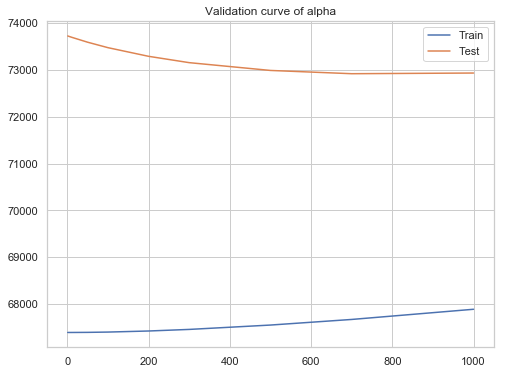

In [46]:
ridge=Ridge(random_state=42)
param_name='alpha'
param_range = [1,10,50,100,200,300,500,700,1000]
#param_range=[1,10,100,800,900,1000,1200,1400,1600,1800,2000]
#scoring='r2'
scoring='neg_mean_squared_error'
curve=validation_curve(ridge,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)

n=len(param_range)
'''if scoring=='r2':
    train_score=[curve[0][i].mean() for i in range (0,n)]
    test_score=[curve[1][i].mean() for i in range (0,n)]
elif scoring=='neg_mean_squared_error':
    train_score=[np.sqrt(-curve[0][i].mean()) for i in range (0,n)]
    test_score=[np.sqrt(-curve[1][i].mean()) for i in range (0,n)]
    '''

plot_validation_curve(curve,param_range,param_name,scoring)

From above plot It can be seen that Train and Test scores are almost after alpha=700.

Even at alpha=0, difference between RMSE is not much, so there is no objectionable overfitting. As alpha is increased, bias is increasing and so the RMSE.

As linear regression is not overfitting the model, using Ridge regression is not necessary.